# 第4章: 形態素解析

In [1]:
!wget https://nlp100.github.io/data/neko.txt

Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/home/altair626/.wget-hsts'. HSTS will be disabled.
--2020-04-20 19:49:12--  https://nlp100.github.io/data/neko.txt
Resolving nlp100.github.io (nlp100.github.io)... 185.199.108.153, 185.199.111.153, 185.199.110.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 965825 (943K) [text/plain]
Saving to: ‘neko.txt’

neko.txt            100%[===================>] 943.19K  --.-KB/s    in 0.07s   

2020-04-20 19:49:13 (13.3 MB/s) - ‘neko.txt’ saved [965825/965825]



In [2]:
!mecab <neko.txt > neko.txt.mecab

## 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [3]:
def make_novellist():
    with open("./neko.txt.mecab") as intxt:
        alltxt = intxt.read()
        novel_list = []
        for sentence in alltxt.split("EOS"):
            if sentence != "\n":
                sentence_list = []
                for word in sentence.split("\n"):
                    if word != "":
                        winfo = {}
                        winfo["surface"] = word.split("\t")[0]
                        winfo["base"] = word.split("\t")[1].split(",")[6]
                        winfo["pos"] = word.split("\t")[1].split(",")[0]
                        winfo["pos1"] = word.split("\t")[1].split(",")[1]
                        sentence_list.append(winfo)
                novel_list.append(sentence_list)
    return novel_list

novel_list = make_novellist()

In [4]:
print(novel_list[1])

[{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}, {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}, {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}, {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}]


## 31. 動詞
動詞の表層形をすべて抽出せよ．

In [5]:
verb_surfaces = []
for sentence_list in novel_list:
    for word_info in sentence_list:
        if word_info["pos"]=="動詞":
            verb_surfaces.append(word_info["surface"])

for i in verb_surfaces[:20]:
    print(i)

生れ
つか
し
泣い
し
いる
始め
見
聞く
捕え
煮
食う
思わ
載せ
られ
持ち上げ
られ
し
あっ
落ちつい


## 32. 動詞の原形
動詞の原形をすべて抽出せよ．

In [6]:
verb_bases = []
for sentence_list in novel_list:
    for word_info in sentence_list:
        if word_info["pos"]=="動詞":
            verb_bases.append(word_info["base"])

for i in verb_bases[:20]:
    print(i)

生れる
つく
する
泣く
する
いる
始める
見る
聞く
捕える
煮る
食う
思う
載せる
られる
持ち上げる
られる
する
ある
落ちつく


## 33. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [7]:
no_concats = []
for sentence_list in novel_list:
    for i in range(len(sentence_list)-2):
        if sentence_list[i]["pos"]=="名詞" and sentence_list[i+1]["surface"]=="の" and sentence_list[i+2]["pos"]=="名詞":
            no_concats.append(sentence_list[i]["surface"]+sentence_list[i+1]["surface"]+sentence_list[i+2]["surface"])

for i in no_concats[:20]:
    print(i)

彼の掌
掌の上
書生の顔
はずの顔
顔の真中
穴の中
書生の掌
掌の裏
何の事
肝心の母親
藁の上
笹原の中
池の前
池の上
一樹の蔭
垣根の穴
隣家の三
時の通路
一刻の猶予
家の内


## 34. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [8]:
noun_concats = []
for sentence_list in novel_list:
    i=0
    string = ""
    while i < len(sentence_list):
        if sentence_list[i]["pos"]=="名詞" and i<len(sentence_list)-1 and sentence_list[i+1]["pos"]=="名詞":
            string = sentence_list[i]["surface"]
            while i+1<len(sentence_list) and sentence_list[i+1]["pos"]=="名詞":
                i+=1
                string += sentence_list[i]["surface"]
            noun_concats.append(string)
        i+=1

for i in noun_concats[:20]:
    print(i)

人間中
一番獰悪
時妙
一毛
その後猫
一度
ぷうぷうと煙
邸内
三毛
書生以外
四五遍
この間おさん
三馬
御台所
まま奥
住家
終日書斎
勉強家
勉強家
勤勉家


## 35. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [9]:
freq_dic = {}
for sentence_list in novel_list:
    for word_info in sentence_list:
        if word_info["surface"] in freq_dic:
            freq_dic[word_info["surface"]] += 1
        else:
            freq_dic[word_info["surface"]] = 1
sorted_freq_dic=sorted(freq_dic.items(), key=lambda e:e[1],reverse=True)
    
for i in sorted_freq_dic[:20]:
    print(i)

('の', 9194)
('。', 7486)
('て', 6868)
('、', 6772)
('は', 6420)
('に', 6243)
('を', 6071)
('と', 5508)
('が', 5337)
('た', 3988)
('で', 3806)
('「', 3231)
('」', 3225)
('も', 2479)
('ない', 2390)
('だ', 2363)
('し', 2322)
('から', 2032)
('ある', 1728)
('な', 1613)


## 36. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [10]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
fp = FontProperties(fname='/usr/share/fonts/TakaoPGothic.ttf', size=14)

('の', 9194)
('。', 7486)
('て', 6868)
('、', 6772)
('は', 6420)
('に', 6243)
('を', 6071)
('と', 5508)
('が', 5337)
('た', 3988)


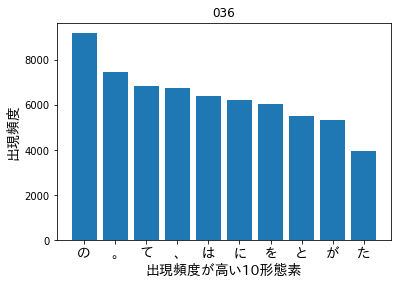

In [11]:
label = []
left = [i for i in range(10)]
value = []
for i in sorted_freq_dic[:10]:
    print(i)
    label.append(i[0])
    value.append(i[1])
plt.bar(left, value, width=0.8)
plt.xticks(left, label, fontproperties=fp)
plt.title("036")
plt.xlabel("出現頻度が高い10形態素",fontproperties=fp)
plt.ylabel("出現頻度",fontproperties=fp)
plt.show()
#plt.savefig("figure36.png")

## 37. 「猫」と共起頻度の高い上位10語
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

('の', 391)
('は', 272)
('、', 252)
('に', 250)
('を', 232)
('て', 229)
('。', 209)
('と', 202)
('が', 180)
('で', 170)


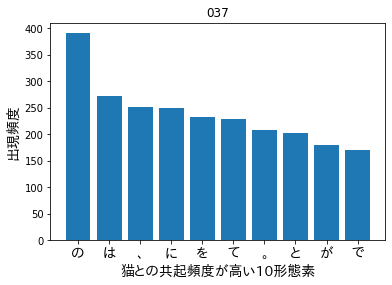

In [12]:
neko_coocfreq_dic = {}
for sentence_list in novel_list:
    flag=0
    for word_info in sentence_list:
        if word_info["surface"]=="猫":
            flag=1
    if flag:
        for word_info in sentence_list:
            if word_info["surface"] != "猫":
                if word_info["surface"] in neko_coocfreq_dic:
                    neko_coocfreq_dic[word_info["surface"]] += 1
                else:
                    neko_coocfreq_dic[word_info["surface"]] = 1
sorted_nekofreq_dic=sorted(neko_coocfreq_dic.items(), key=lambda e:e[1],reverse=True)
    
label = []
left = [i for i in range(10)]
value = []
for i in sorted_nekofreq_dic[:10]:
    print(i)
    label.append(i[0])
    value.append(i[1])
plt.bar(left, value, width=0.8)
plt.xticks(left, label, fontproperties=fp)
plt.title("037")
plt.xlabel("猫との共起頻度が高い10形態素",fontproperties=fp)
plt.ylabel("出現頻度",fontproperties=fp)
plt.show()
#plt.savefig("figure37.png")

## 38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

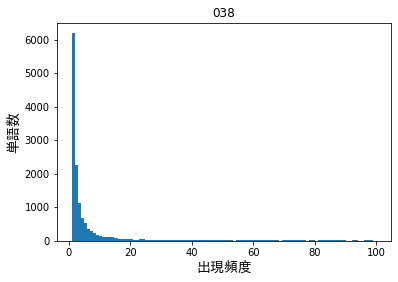

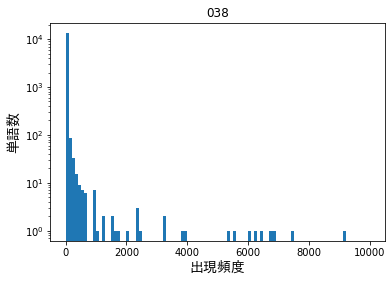

In [13]:
value = []
for i in sorted_freq_dic:
    value.append(i[1])
plt.hist(value, bins=100, range=(1,100))
plt.title("038")
plt.xlabel("出現頻度",fontproperties=fp)
plt.ylabel("単語数",fontproperties=fp)
#plt.savefig("figure38.png")
plt.show()

plt.hist(value, bins=100, range=(1,10000), log=True)
plt.title("038")
plt.xlabel("出現頻度",fontproperties=fp)
plt.ylabel("単語数",fontproperties=fp)
#plt.savefig("figure38-log.png")
plt.show()

## 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

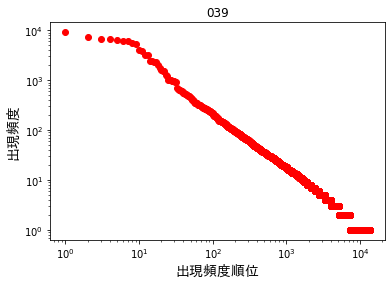

In [14]:
value = []
for i in sorted_freq_dic:
    value.append(i[1])
rank = [i for i in range(1,len(value)+1)]

plt.scatter(rank,value, c="r")
plt.title("039")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("出現頻度順位",fontproperties=fp)
plt.ylabel("出現頻度",fontproperties=fp)
#plt.savefig("figure39.png")
plt.show()